In [38]:
# Import necessary librariers for data handling , modeling , and visulization
import pandas as pd # For data manipulation and reading CSV 
import numpy as np # For numerical operatioms 
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # For feature standardization
from sklearn.linear_model import LogisticRegression # For logistic regression model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve# For model evaluation metrics
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For enhanced visulization 

In [39]:
# load the Breast Cancer Wisconsin Dtaset 
# The dataset contains features from breast mass images and a 'diagnosis' column (M= malignant , B= benign)
data = pd.read_csv('data.csv')

In [40]:
# Inspect the data for NaNs and column types
print("Checking for NaNs in the dataset:")
print(data.isna().sum())  # Print number of NaNs per column
print("\nColumn data types:")
print(data.dtypes)  # Print data types of each column

Checking for NaNs in the dataset:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fract

In [41]:
# Drop the 'id' column (not useful for prediction) and any problematic columns (e.g., 'Unnamed: 32')
# The Breast Cancer dataset often has an empty 'Unnamed: 32' column with all NaNs
if 'Unnamed: 32' in data.columns:
    data = data.drop('Unnamed: 32', axis=1)
data = data.drop('id', axis=1)

In [42]:
# Prepare features (X) and target (y)
# Encode the target variable: Malignant (M) = 1, Benign (B) = 0
X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Target

In [43]:
# Handle missing values by imputing with the mean for numeric columns
# Apply imputation before splitting to ensure consistency
X = X.fillna(X.mean())

In [44]:
# Verify that no NaNs remain in X
if X.isna().any().any():
    raise ValueError("NaNs still present in X after imputation. Check data.")

In [45]:
# Verify that no NaNs remain in X
if X.isna().any().any():
    raise ValueError("NaNs still present in X after imputation. Check data.")

In [46]:
# Split the data into training (80%) and testing (20%) sets
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standardize features to have mean=0 and variance=1
# This is critical for logistic regression to perform well
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit scaler on training data and transform
X_test = scaler.transform(X_test)  # Apply same transformation to test data

In [48]:
# Verify no NaNs in transformed data
if np.any(np.isnan(X_train)) or np.any(np.isnan(X_test)):
    raise ValueError("NaNs found in standardized X_train or X_test.")

In [49]:
# Initialize and train the logistic regression model
# random_state=42 ensures consistent results
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Train the model on the standardized training data

LogisticRegression(random_state=42)

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)  # Predicted class labels (0 or 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class (Malignant)

In [51]:
#Evaluate the model using multiple metrics
# 1. Confusion Matrix: Shows True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[70  1]
 [ 2 41]]


In [52]:
# 2. Precision: TP / (TP + FP) - How many predicted positives are actually positive
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9762


In [53]:
# 3. Recall: TP / (TP + FN) - How many actual positives are correctly identified
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9535


In [55]:
# 4. ROC-AUC: Area under the ROC curve, measures ability to distinguish between classes
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.9974


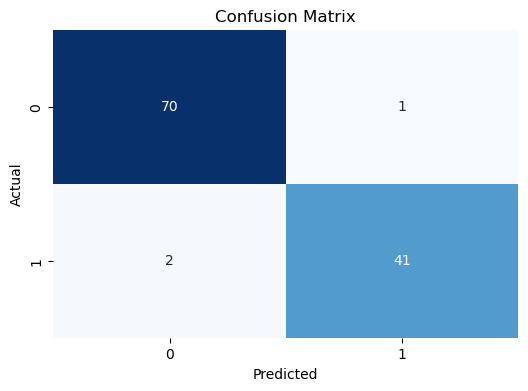

In [56]:
# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Plot heatmap with counts
plt.title('Confusion Matrix')  # Add title
plt.ylabel('Actual')  # Label for actual classes
plt.xlabel('Predicted')  # Label for predicted classes
plt.show()  # Display the plot

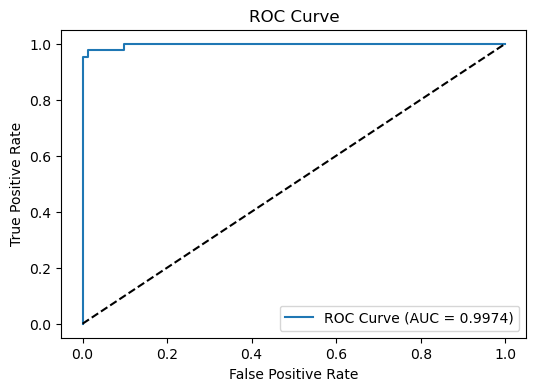

In [57]:
# Plot the ROC Curve to visualize model performance across thresholds
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Compute false positive rate and true positive rate
plt.figure(figsize=(6, 4))  # Set figure size
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line (random guessing)
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')  # Label y-axis
plt.title('ROC Curve')  # Add title
plt.legend()  # Show legend with AUC
plt.show()  # Display the plot

In [58]:
# Threshold Tuning: Adjust decision threshold to prioritize recall
# In medical diagnostics, high recall is crucial to minimize false negatives (missed malignant cases)
threshold = 0.3  # Lower threshold to increase recall
y_pred_custom = (y_pred_proba >= threshold).astype(int)  # Predict 1 if probability >= 0.3
print("Custom Threshold (0.3) Metrics:")  # Print header for custom threshold results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))  # Confusion matrix for new threshold
print(f"Precision: {precision_score(y_test, y_pred_custom):.4f}")  # Precision with new threshold
print(f"Recall: {recall_score(y_test, y_pred_custom):.4f}")  # Recall with new threshold

Custom Threshold (0.3) Metrics:
Confusion Matrix:
 [[67  4]
 [ 1 42]]
Precision: 0.9130
Recall: 0.9767


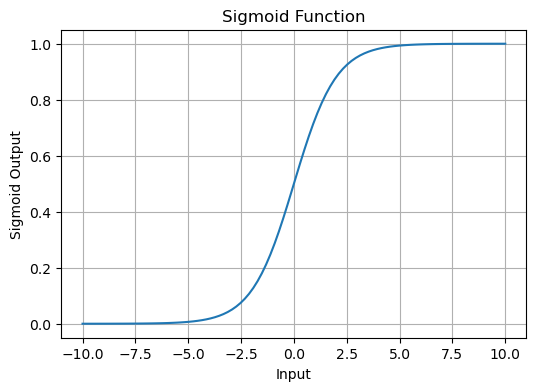

In [59]:
# Visualize the Sigmoid Function
# The sigmoid function maps any real number to (0,1), used in logistic regression for probability
x = np.linspace(-10, 10, 100)  # Create 100 points from -10 to 10
sigmoid = 1 / (1 + np.exp(-x))  # Compute sigmoid: 1 / (1 + e^(-x))
plt.figure(figsize=(6, 4))  # Set figure size
plt.plot(x, sigmoid)  # Plot sigmoid curve
plt.title('Sigmoid Function')  # Add title
plt.xlabel('Input')  # Label x-axis
plt.ylabel('Sigmoid Output')  # Label y-axis
plt.grid(True)  # Add grid for clarity
plt.show()  # Display the plot